In [72]:
!pip install --upgrade plotly
!pip install sweetviz

In [73]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sw
import warnings

#picture import
from IPython.display import Image, display

from attr import dataclass
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

In [74]:
 = pd.read_csv('titanic/train.csv')

In [75]:
.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [76]:
data_clean.describe(include="all")

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [77]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [78]:
print(data_clean.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Removing unnecessary column

In [79]:
data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Ticket', axis=1)
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

# To do : add data description (picture that Ronen sent me)

We choose to visualisy the data with SweetVIZ becouse we a limited number of feature

                                             |          | [  0%]   00:00 -> (? left)


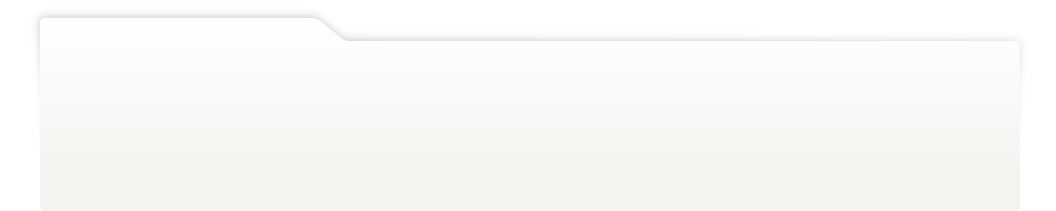
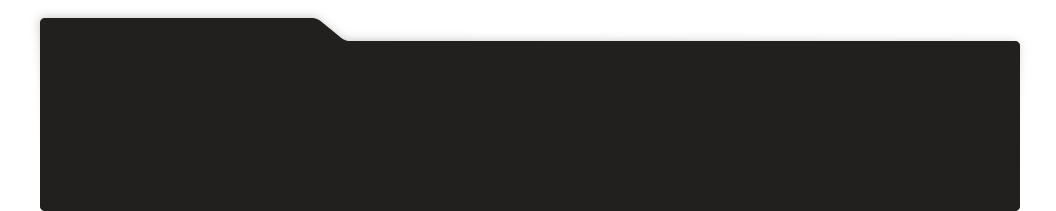
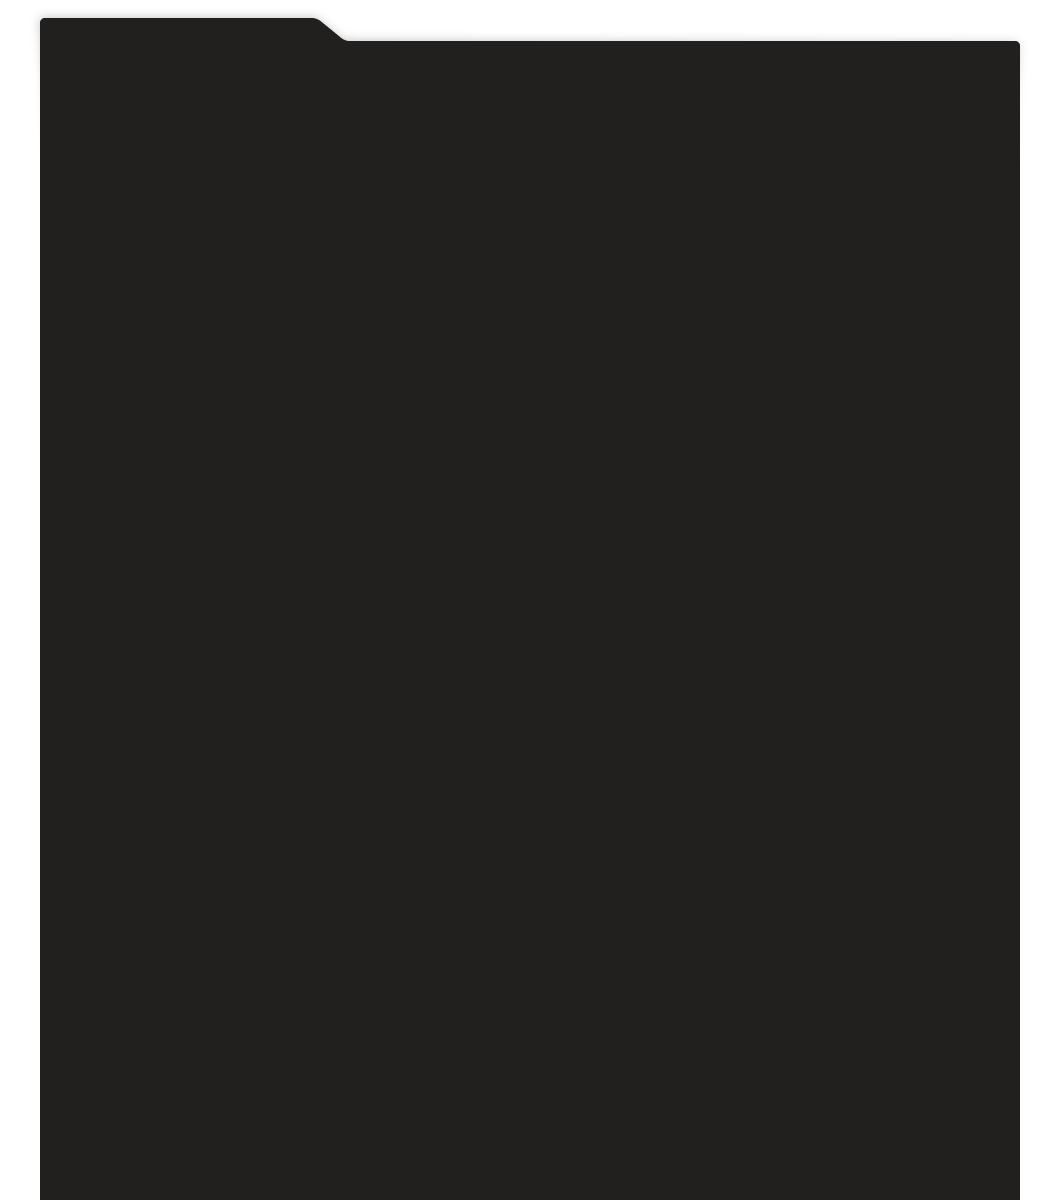
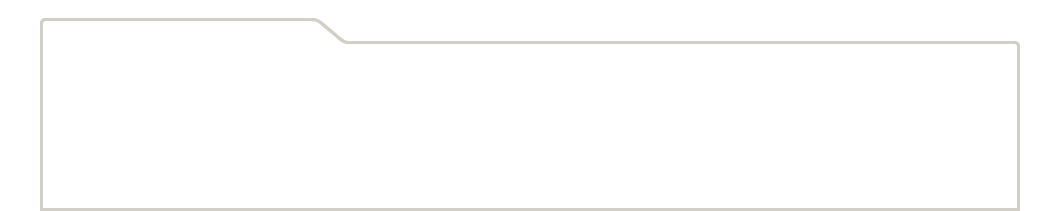
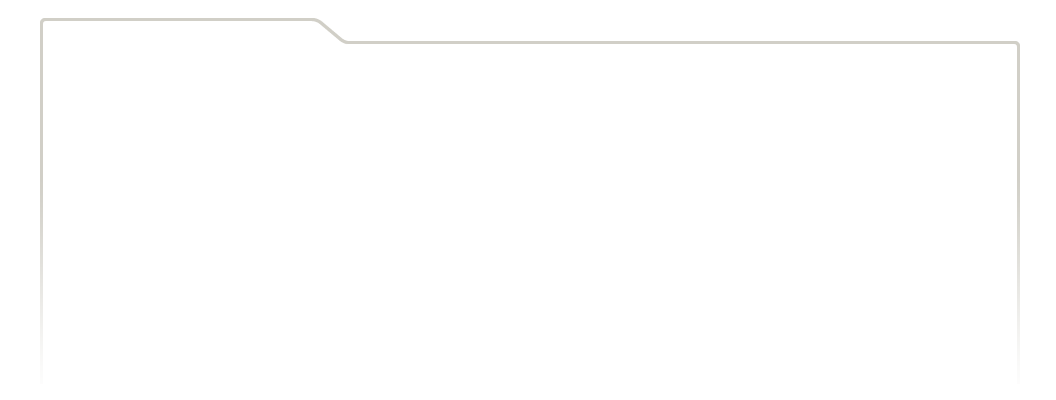
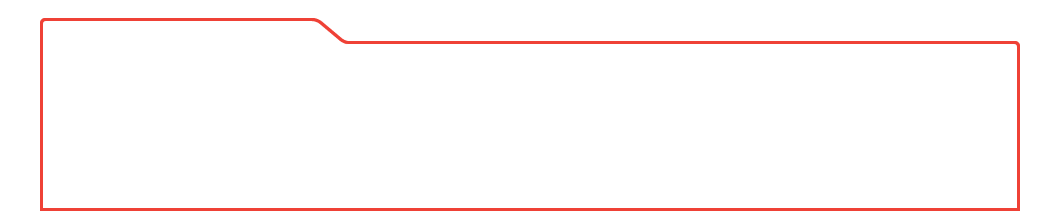
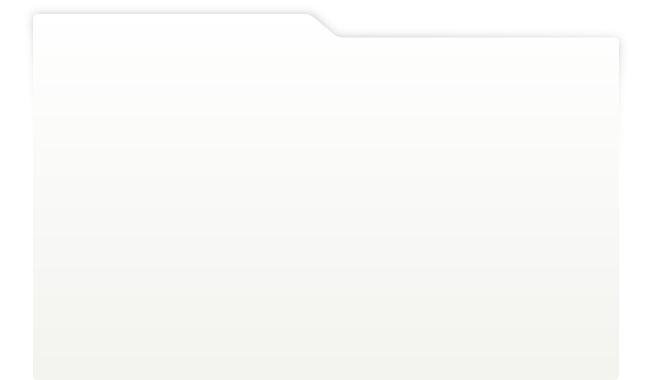
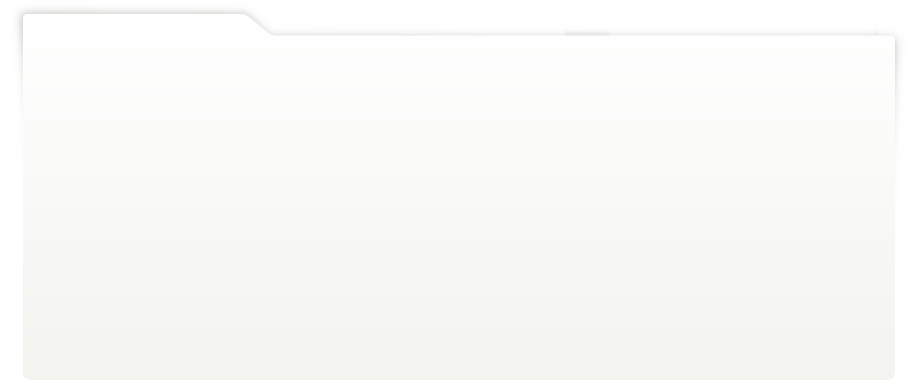
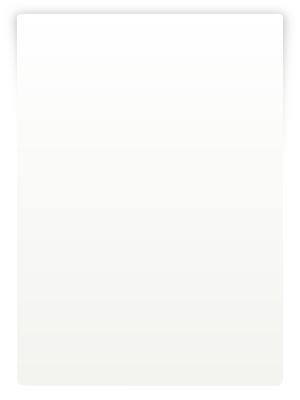
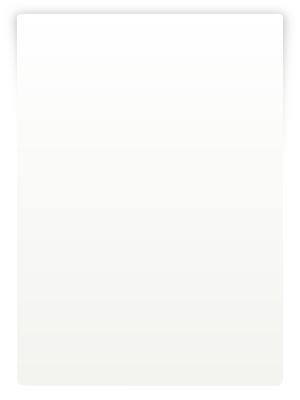
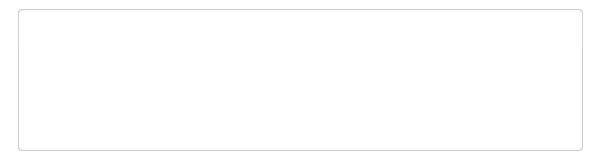
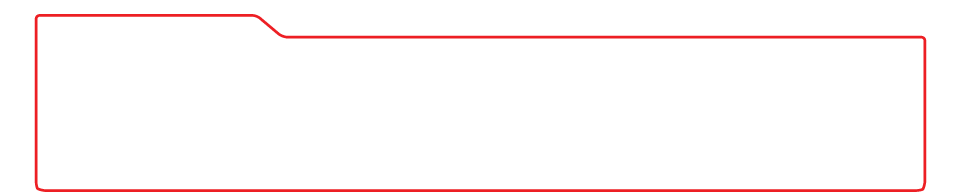
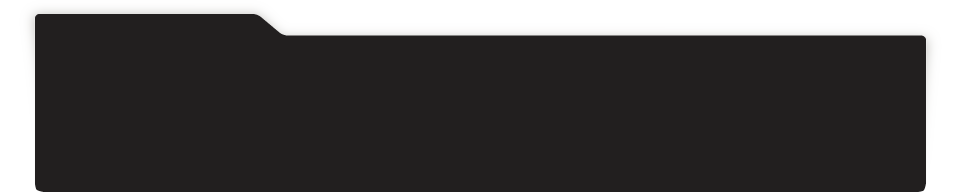
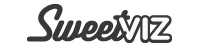
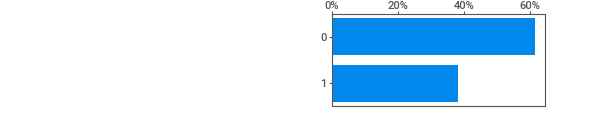
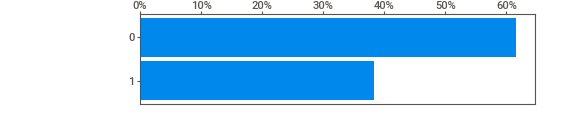
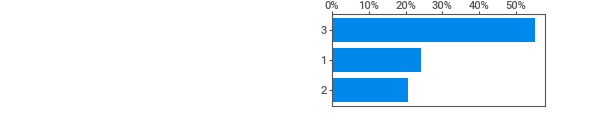
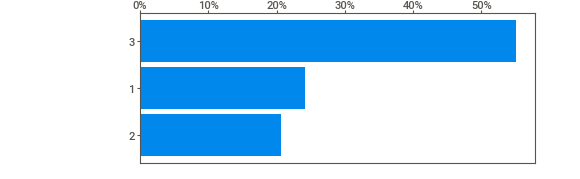
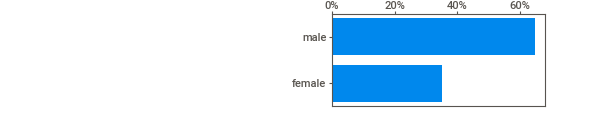
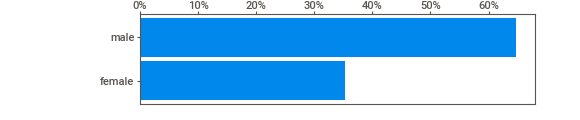
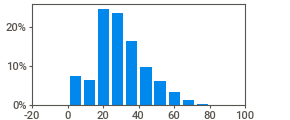
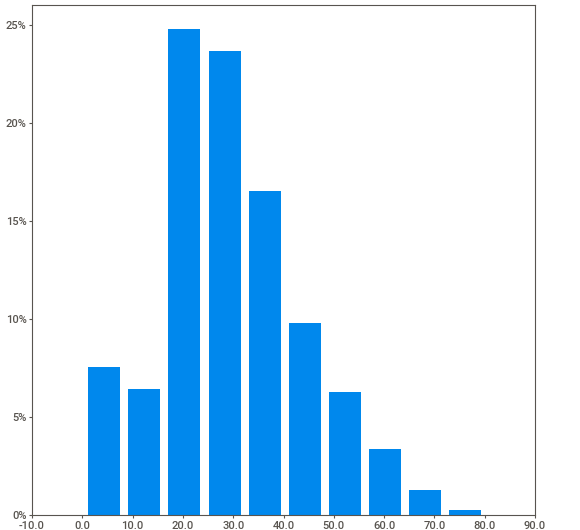
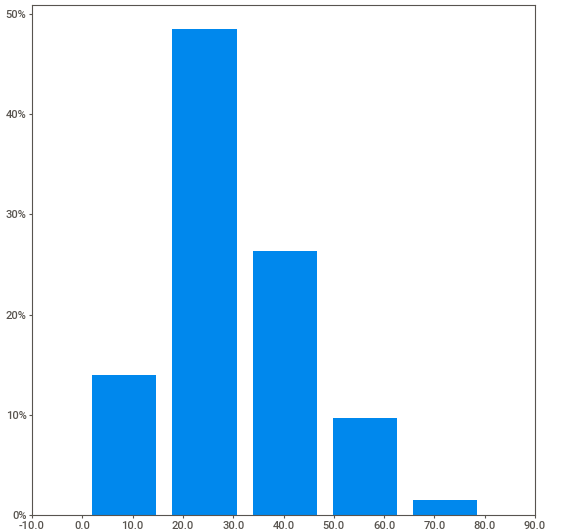
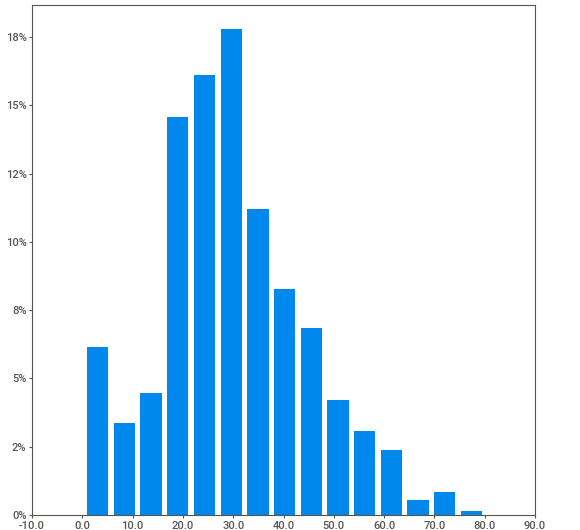
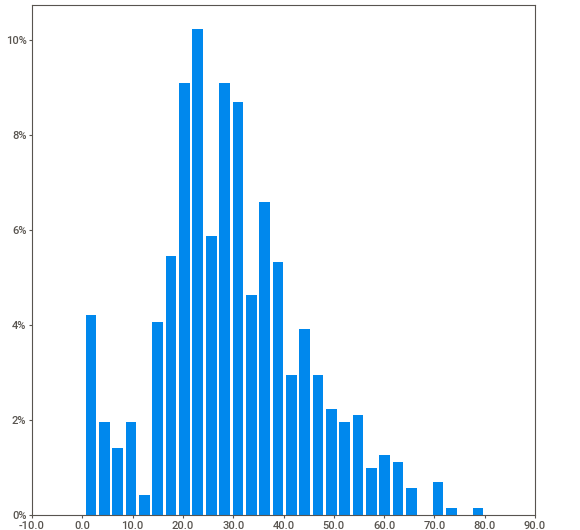
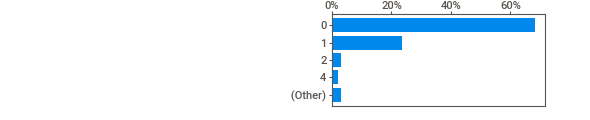
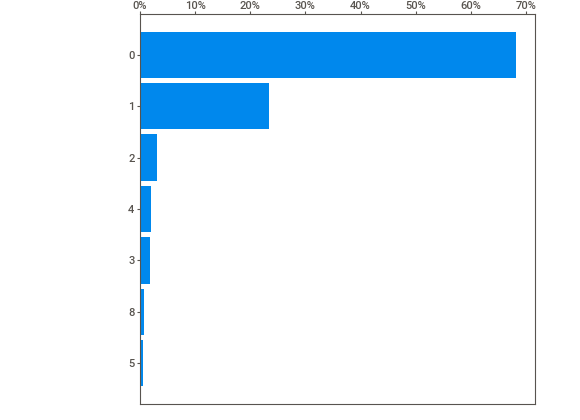
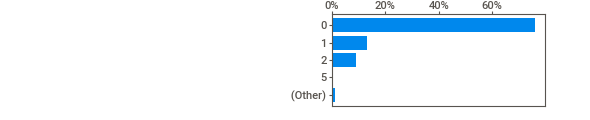
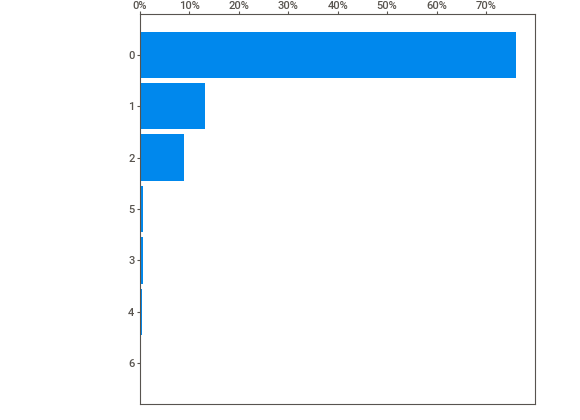
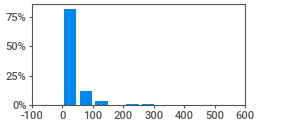
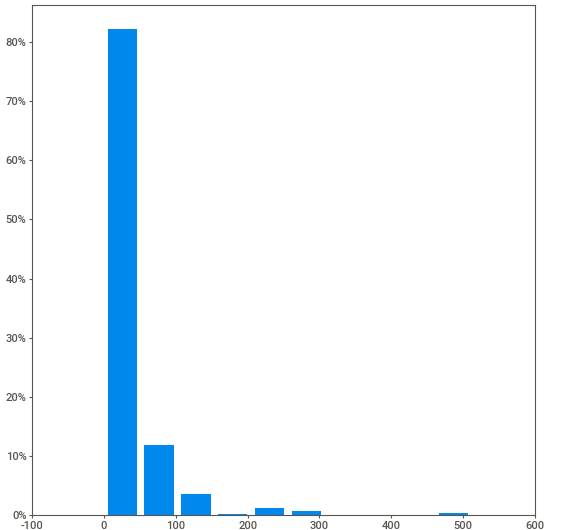
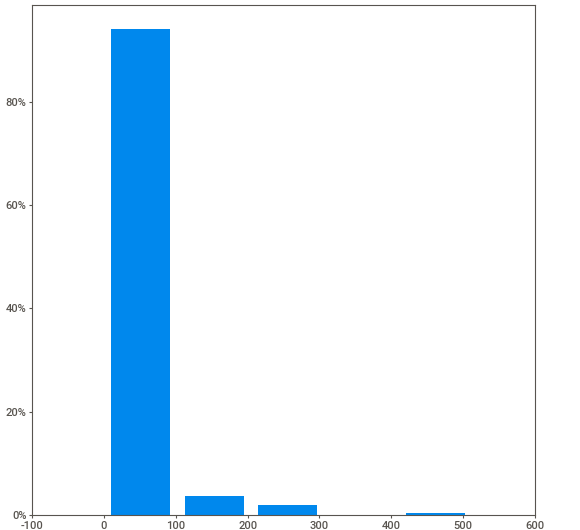
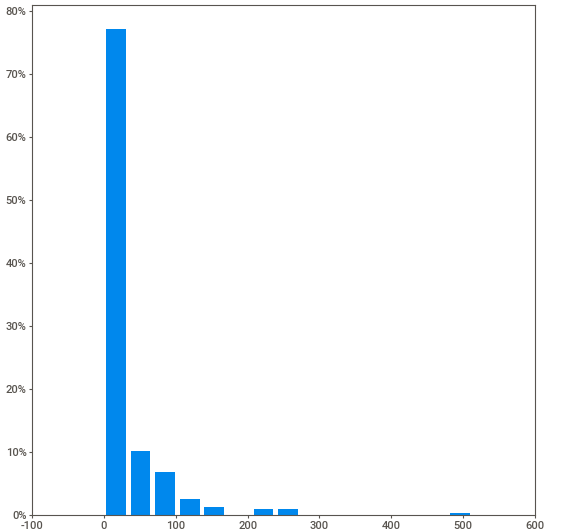
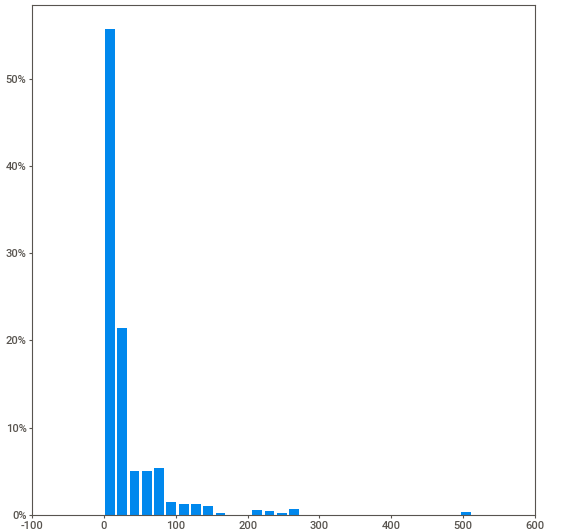
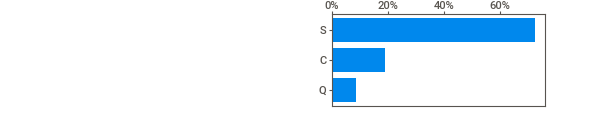
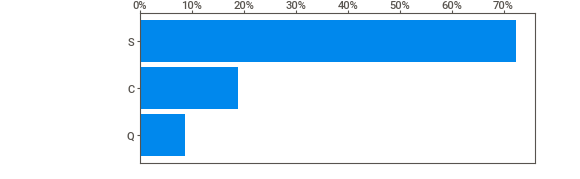
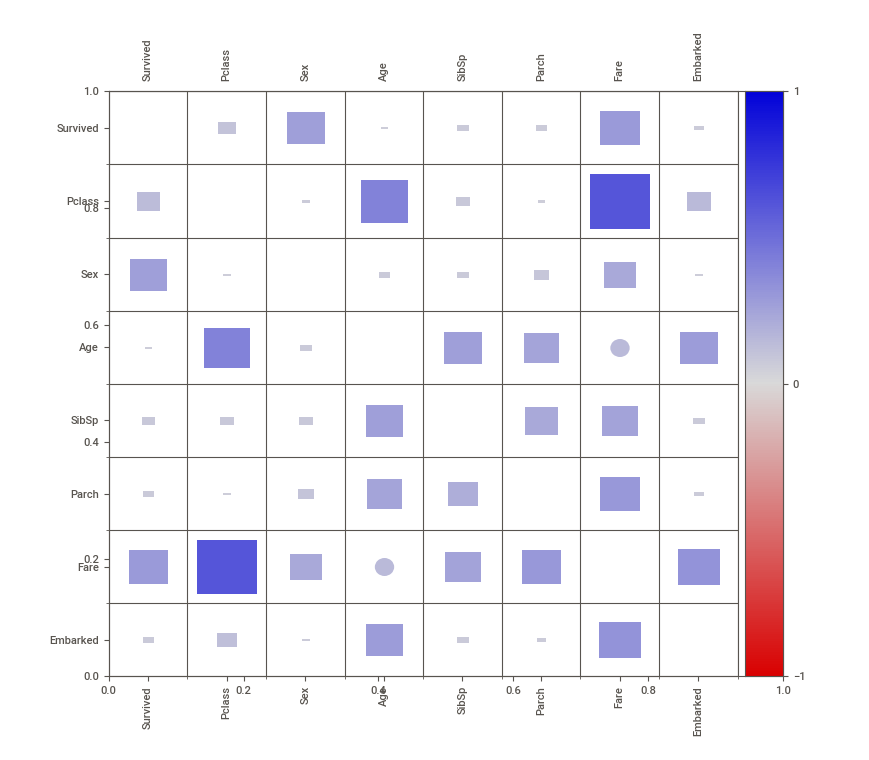
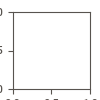

In [80]:
data_report = sw.analyze(data_clean)
data_report.show_notebook(layout='vertical')

# From this visualisation we can see that there is 3 features with missing data
* Age (20% of data missing)
* Cabin (77% of data missing)
* Embarked (2% of data missing)

# Data processing
The Age we can fill with average age from data set
Same we can do with Embarked

But for Cabin number its difficult to just fill so our plan is to create a second data set with no Cabin feature and in the first one transform the column (Cabin feature) to binary option (1 - has Cabin number, 0 - has no Cabin number)


Created a copy of the original data

In [81]:
data_clean_null = data_clean.copy()   # Data set where we ignored the missing values
data_clean = data_clean.copy()        # Data set where we filled the missing values

In [82]:
# Replace missing values with mean
data_clean['Age']=data_clean['Age'].fillna(data_clean['Age'].mean())
data_clean['Embarked']=data_clean['Embarked'].fillna(data_clean['Embarked'].mode()[0])

#The Cabin feature Drop
data_clean.drop(['Cabin'], axis=1, inplace=True)

                                             |          | [  0%]   00:00 -> (? left)


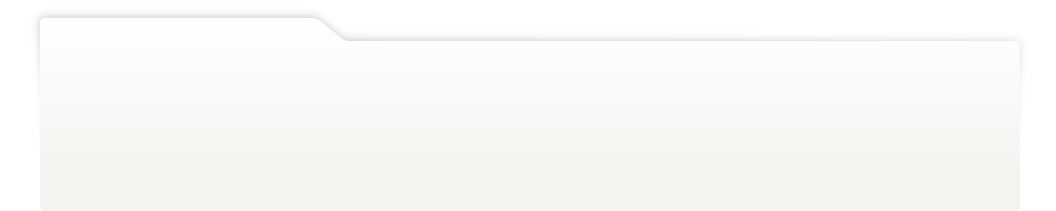
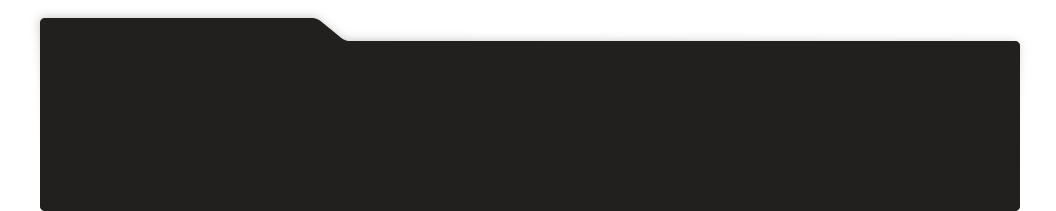
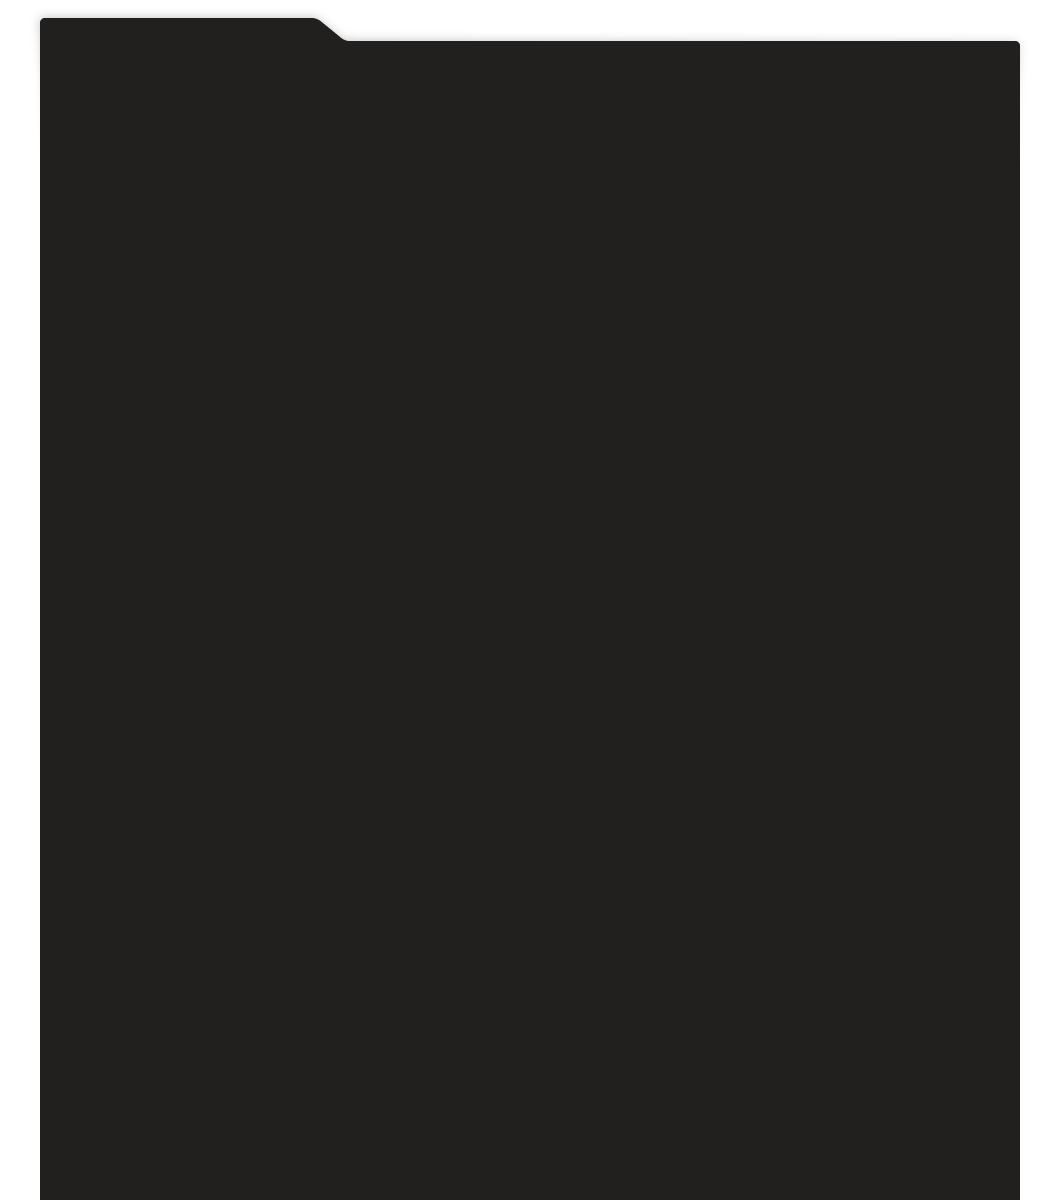
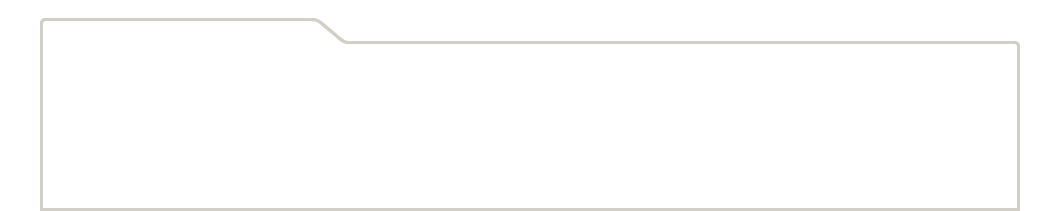
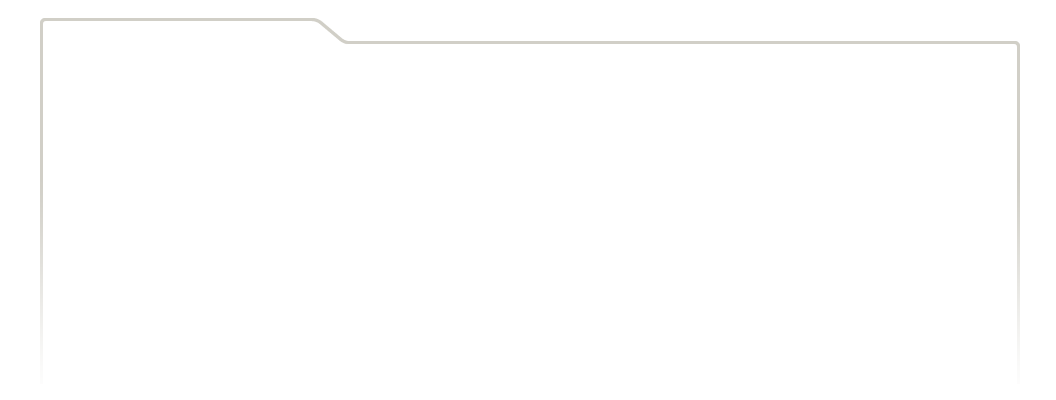
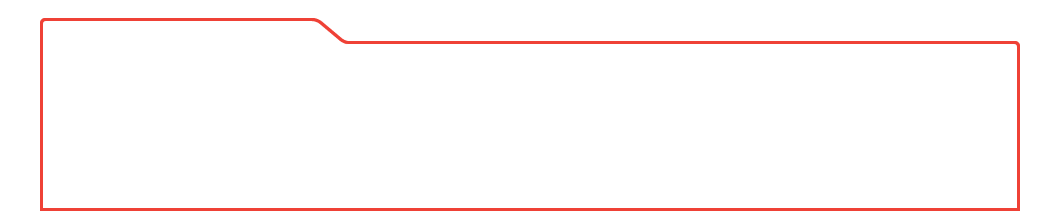
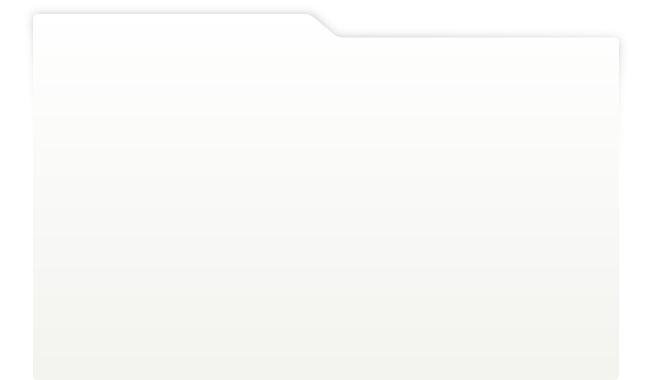
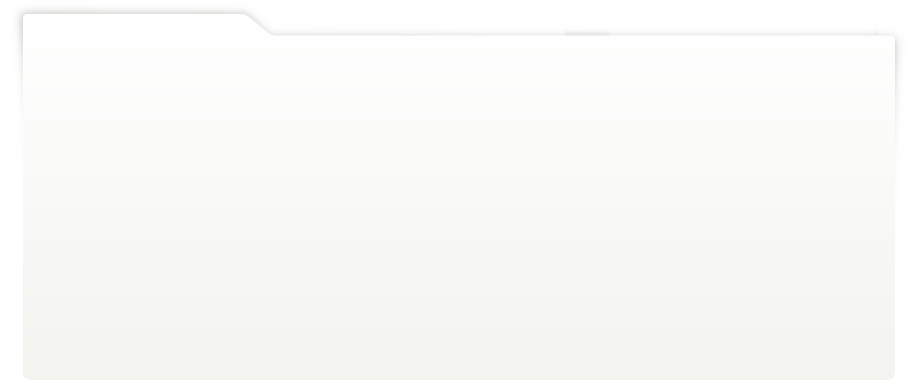
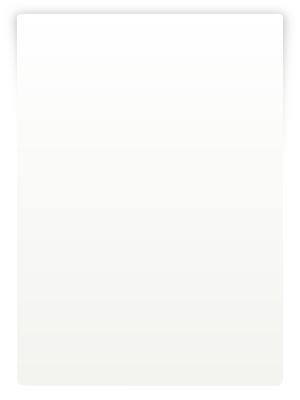
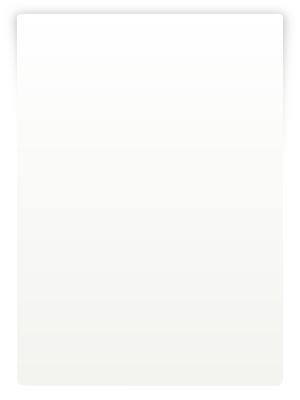
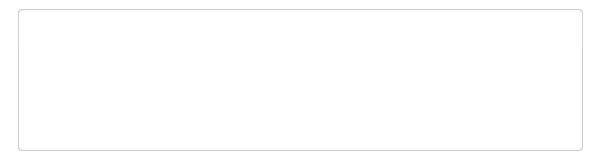
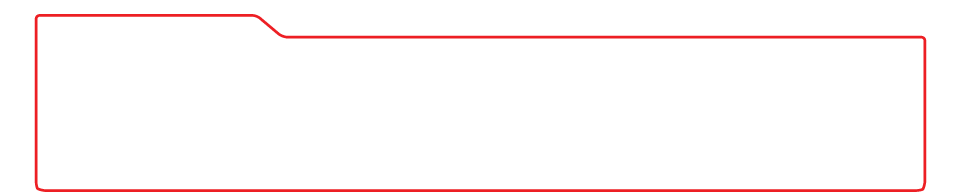
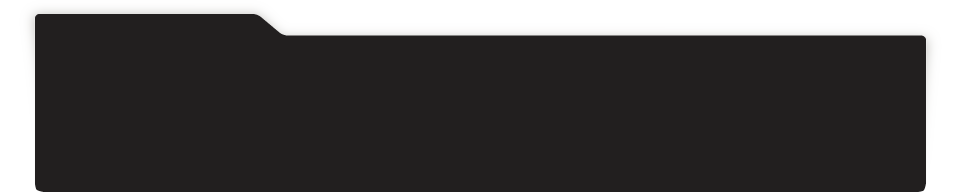
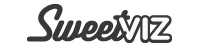
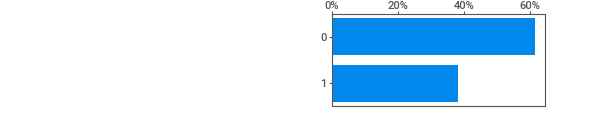
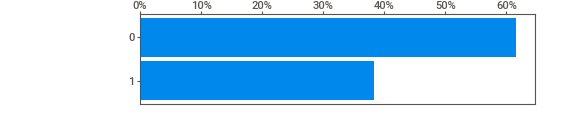
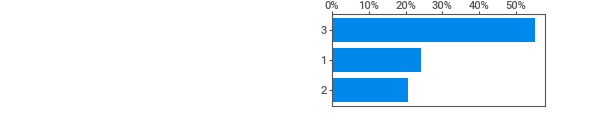
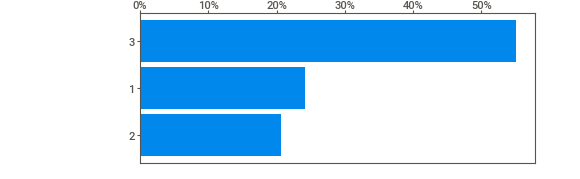
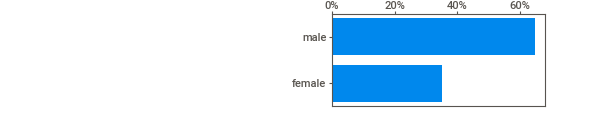
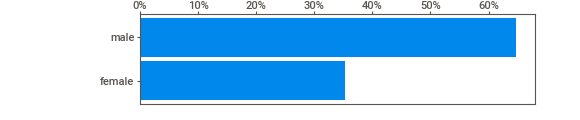
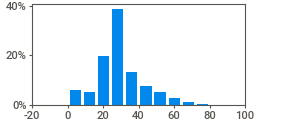
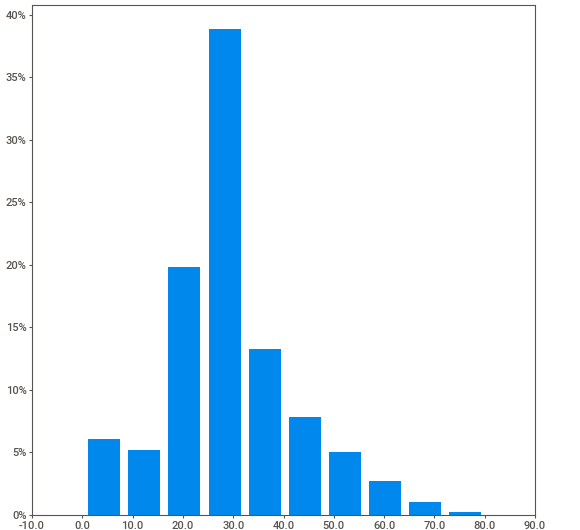
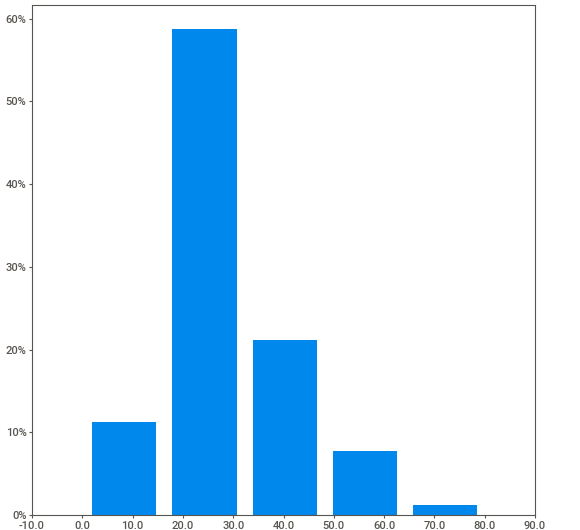
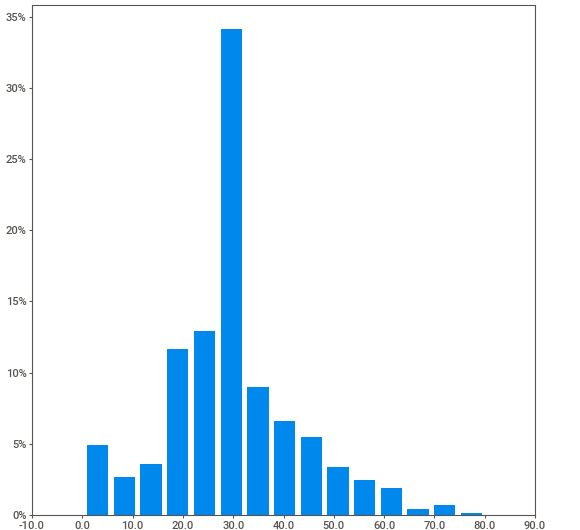
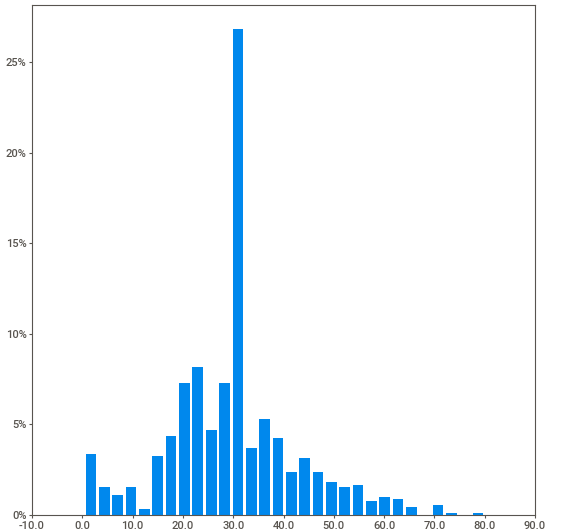
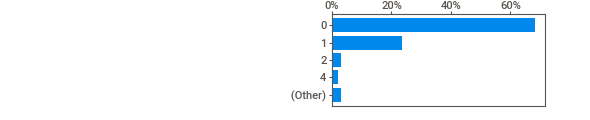
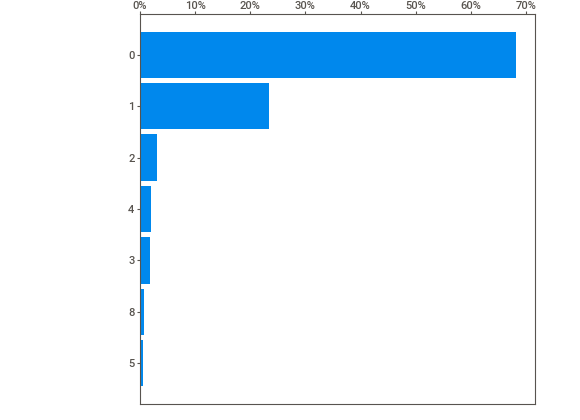
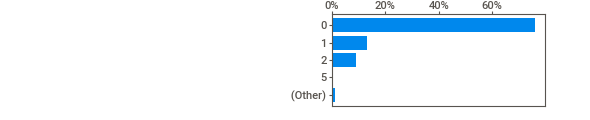
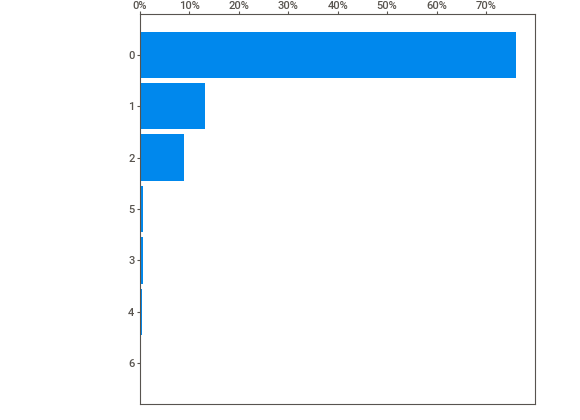
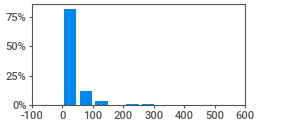
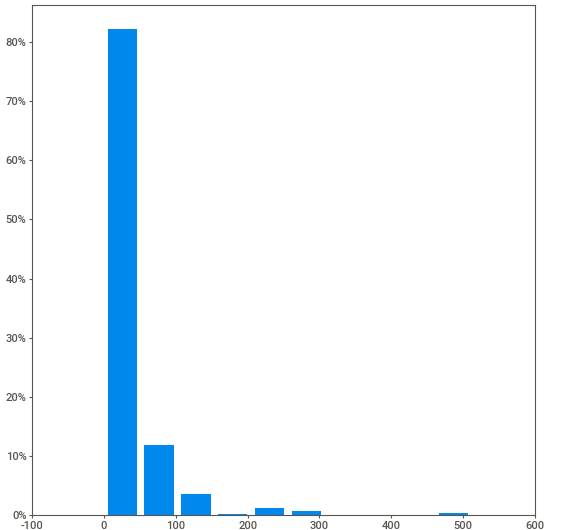
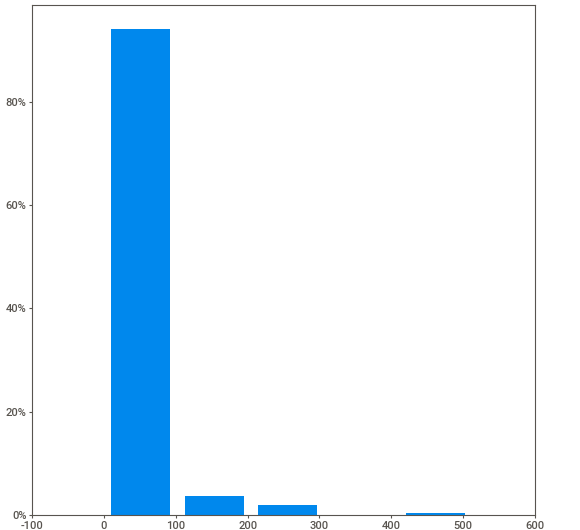
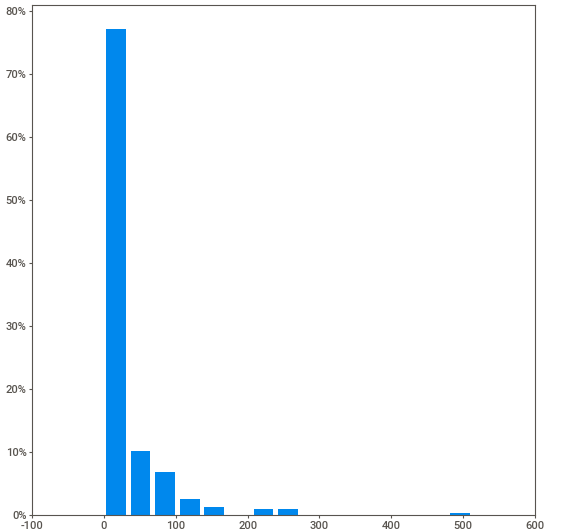
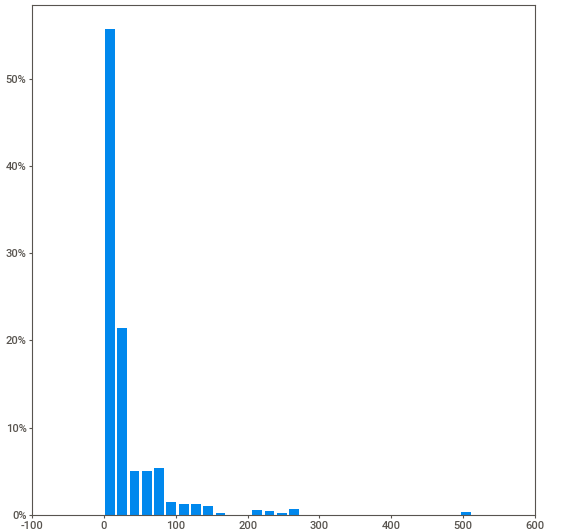
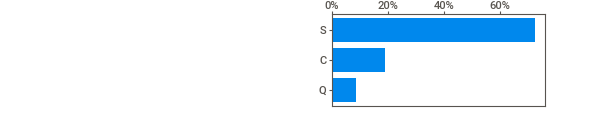
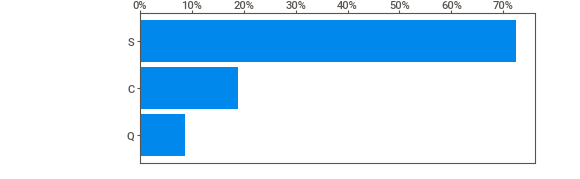
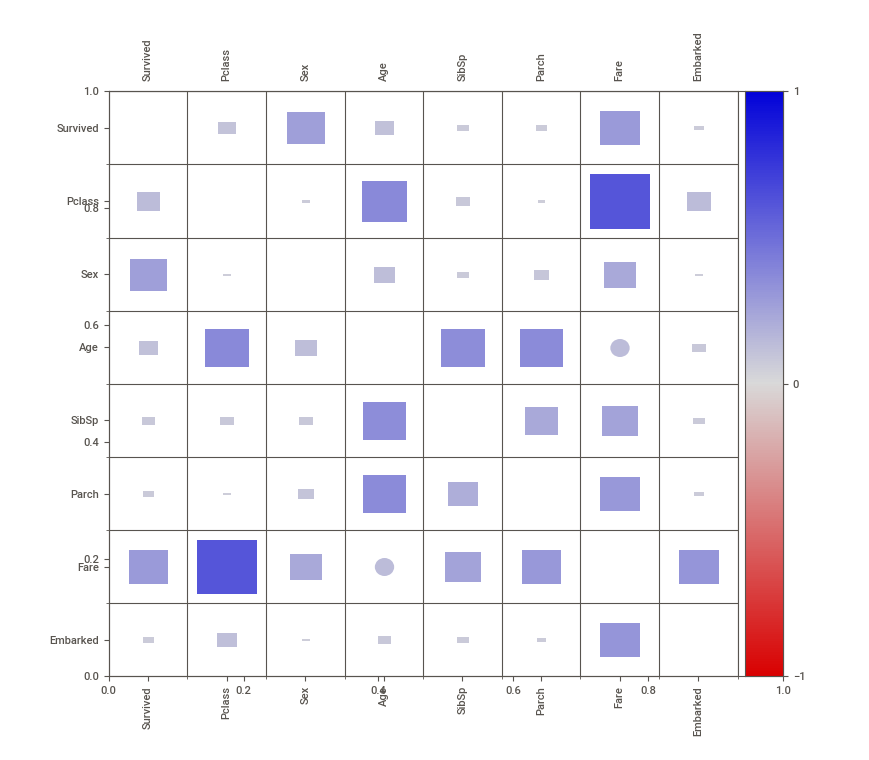
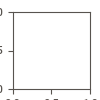

In [83]:
data_report_new = sw.analyze(data_clean)
data_report_new.show_notebook(layout='vertical')

In [84]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Now we want to replace the categorical columns with numerical values

In [85]:
# # Extract the categorical columns
# categorical_columns = data_clean.select_dtypes(include=['object']).columns
#
# # Initialize the OneHotEncoder with drop='first' to avoid dummy variable trap
# encoder = OneHotEncoder(drop='first', sparse_output=False)
#
# # Perform one-hot encoding
# encoded_data = pd.DataFrame(
#     encoder.fit_transform(data_clean[categorical_columns]),
#     columns=encoder.get_feature_names_out(categorical_columns)
# )
#
# # Drop the original categorical columns and concatenate the encoded data
# data_clean = pd.concat([data_clean.drop(columns=categorical_columns), encoded_data], axis=1)
data_clean = pd.get_dummies(data_clean, columns=['Sex', 'Embarked'], drop_first=True)


In [86]:
# Convert boolean columns to numerical (0 and 1)
data_clean['Sex_male'] = data_clean['Sex_male'].astype(int)
data_clean['Embarked_Q'] = data_clean['Embarked_Q'].astype(int)
data_clean['Embarked_S'] = data_clean['Embarked_S'].astype(int)

# Confirm the changes
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None


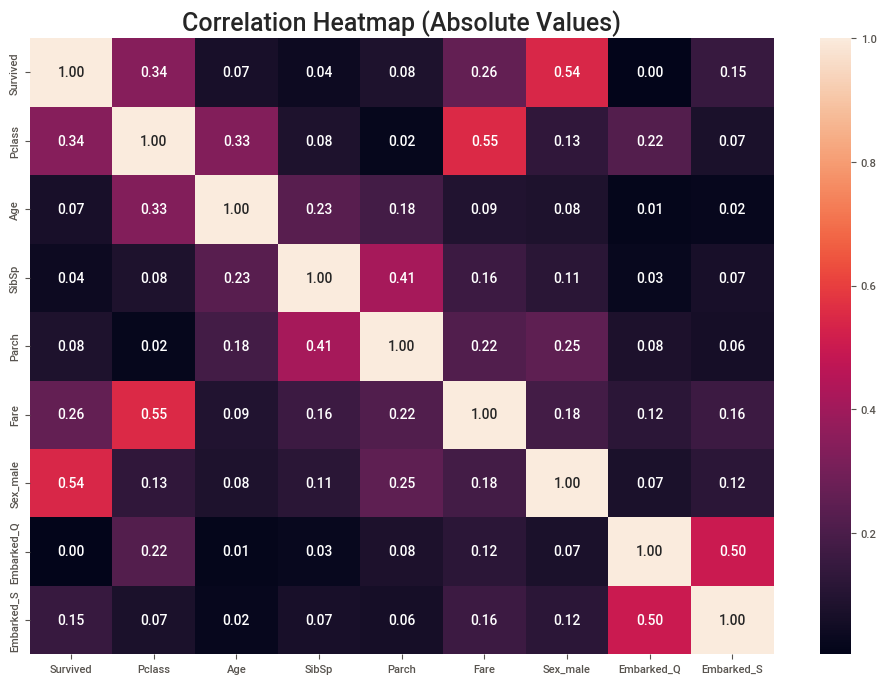

In [90]:
# Increase the figure size for the heatmap
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Compute the correlation matrix and use absolute values
corr = data_clean.corr().abs()

# Plot the heatmap with absolute values
sns.heatmap(corr, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap (Absolute Values)', fontsize=18)  # Increase title font size
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X = data_clean.drop("Survived", axis=1)
y = data_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Displaying y and X correctly
print('y (Target Variable):')
print(y.head())  # Display the first few rows of y

print('\nX (Feature Set):')
print(X.head(623))  # Display the first few rows of X

y (Target Variable):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

X (Feature Set):
     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500         1           0           1
1         1  38.0      1      0  71.2833         0           0           0
2         3  26.0      0      0   7.9250         0           0           1
3         1  35.0      1      0  53.1000         0           0           1
4         3  35.0      0      0   8.0500         1           0           1
..      ...   ...    ...    ...      ...       ...         ...         ...
618       2   4.0      2      1  39.0000         0           0           1
619       2  26.0      0      0  10.5000         1           0           1
620       3  27.0      1      0  14.4542         1           0           0
621       1  42.0      1      0  52.5542         1           0           1
622       3  20.0      1      1  15.7417         1           0          

In [101]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
acc_logreg = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Logistic Regression Accuracy: {acc_logreg}%")

ValueError: Found input variables with inconsistent numbers of samples: [623, 712]